## we solve a regression problem with H20 and with deep nural network with hidden layer

## stock market data prediction with H2O Deep Learning

In [1]:
!pip install quandl

  Created wheel for inflection: filename=inflection-0.3.1-py3-none-any.whl size=6075 sha256=5528a4308c2f3ede2ea900298494554d26a02c352696a897dc1d2269370f0162
  Stored in directory: /root/.cache/pip/wheels/20/80/0f/19bee3c7f2cf5ca41fcc9cdc8ed94c88b9946872651cb5ee91
Successfully built inflection


In [2]:
import quandl

In [3]:
df = quandl.get("WIKI/GOOGL")

In [4]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_242"; OpenJDK Runtime Environment (build 1.8.0_242-8u242-b08-1~deb9u1-b08); OpenJDK 64-Bit Server VM (build 25.242-b08, mixed mode)
  Starting server from /opt/conda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpz4tpqgds
  JVM stdout: /tmp/tmpz4tpqgds/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpz4tpqgds/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.4
H2O cluster version age:,"28 days, 21 hours and 30 minutes"
H2O cluster name:,H2O_from_python_unknownUser_jpog53
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [5]:
df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
train,valid,test = df.split_frame([.7,.2])

In [7]:
train.head()

Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
110.76,113.48,109.05,109.4,1.82561e+07,0,1,55.5515,56.9157,54.6938,54.8694,1.82561e+07
111.24,111.6,103.57,104.87,1.52473e+07,0,1,55.7922,55.9728,51.9454,52.5974,1.52473e+07
104.76,108,103.88,106,9.1886e+06,0,1,52.5422,54.1672,52.1008,53.1641,9.1886e+06
104.95,107.95,104.66,107.91,7.0948e+06,0,1,52.6375,54.1421,52.492,54.1221,7.0948e+06
105.28,105.49,102.01,102.01,5.1967e+06,0,1,52.803,52.9083,51.1629,51.1629,5.1967e+06
102.32,103.71,102.16,102.37,4.9178e+06,0,1,51.3184,52.0156,51.2382,51.3435,4.9178e+06
102.7,102.97,99.67,100.25,9.1382e+06,0,1,51.509,51.6444,49.9893,50.2802,9.1382e+06
99.09,102.37,98.94,101.51,1.51186e+07,0,1,49.6984,51.3435,49.6232,50.9122,1.51186e+07
100.95,101.74,99.32,100.01,5.1524e+06,0,1,50.6313,51.0275,49.8138,50.1598,5.1524e+06
101.01,102,99.61,101.58,5.8475e+06,0,1,50.6614,51.1579,49.9592,50.9473,5.8475e+06


In [8]:
valid.head()

Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
100.01,104.06,95.96,100.335,4.4659e+07,0,1,50.1598,52.1911,48.1286,50.3228,4.4659e+07
101.01,109.08,100.5,108.31,2.28343e+07,0,1,50.6614,54.7089,50.4056,54.3227,2.28343e+07
108.1,108.62,105.69,106.15,6.2117e+06,0,1,54.2174,54.4782,53.0086,53.2393,6.2117e+06
110.56,114.23,110.2,112,1.0713e+07,0,1,55.4512,57.2919,55.2706,56.1734,1.0713e+07
116.95,121.6,116.77,119.36,1.06287e+07,0,1,58.6561,60.9883,58.5658,59.8648,1.06287e+07
120.2,120.42,117.51,117.84,7.2287e+06,0,1,60.2861,60.3964,58.9369,59.1024,7.2287e+06
137.01,138.86,133.85,135.26,1.04721e+07,0,1,68.7171,69.645,67.1322,67.8394,1.04721e+07
134.49,137.61,133.4,137.4,1.16655e+07,0,1,67.4532,69.0181,66.9065,68.9127,1.16655e+07
143.12,149.2,141.21,149.16,1.40363e+07,0,1,71.7816,74.831,70.8236,74.8109,1.40363e+07
150.5,152.4,147.35,147.94,1.81098e+07,0,1,75.483,76.436,73.9031,74.199,1.81098e+07


In [9]:
test.head()

Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
106.63,108.41,106.46,107.5,7.8441e+06,0,1,53.4801,54.3728,53.3948,53.9164,7.8441e+06
118.84,122.63,117.02,120.82,8.5356e+06,0,1,59.604,61.5049,58.6912,60.5971,8.5356e+06
119.56,120.88,117.8,118.26,7.0661e+06,0,1,59.9651,60.6272,59.0824,59.3131,7.0661e+06
121.15,127.4,120.21,126.86,1.6929e+07,0,1,60.7626,63.8972,60.2911,63.6264,1.6929e+07
126.53,135.02,126.23,131.08,3.05164e+07,0,1,63.4609,67.719,63.3104,65.7429,3.05164e+07
137.67,138.45,136,137.08,1.33814e+07,0,1,69.0481,69.4394,68.2106,68.7522,1.33814e+07
143.24,143.55,140.08,140.9,1.97662e+07,0,1,71.8418,71.9972,70.2569,70.6681,1.97662e+07
186.449,192.64,180,181.8,4.45695e+07,0,1,93.5132,96.6183,90.2787,91.1815,4.45695e+07
185.23,189.8,177.4,182,3.34587e+07,0,1,92.9018,95.1939,88.9747,91.2818,3.34587e+07
168.6,169.5,161.31,165.1,2.47116e+07,0,1,84.561,85.0124,80.9047,82.8056,2.47116e+07


In [11]:
x = train.col_names

In [13]:
y = 'Adj. Close'

In [14]:
x.remove(y)

In [16]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
dnn = H2ODeepLearningEstimator(epochs=5,
                              hidden = [200,200,200,200]
                              )

In [17]:
dnn.train(x,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [18]:
hyper_params = {  
"hidden":[[32,32,32],[64,64]],
  "input_dropout_ratio":[0,0.05],
  "rate":[0.01,0.02],
  "rate_annealing":[1e-8,1e-7,1e-6]
}



from h2o.grid.grid_search import H2OGridSearch
dnn1 = H2ODeepLearningEstimator()
nngrid1 = H2OGridSearch(model=dnn1,
                          grid_id='gbm_grid1',
                          hyper_params=hyper_params)

In [19]:
nngrid1.train(x,y,train,validation_frame=valid)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [20]:
print (nngrid1)

            hidden input_dropout_ratio  rate rate_annealing  \
0     [32, 32, 32]                 0.0  0.02         1.0E-8   
1         [64, 64]                 0.0  0.01         1.0E-6   
2         [64, 64]                 0.0  0.02         1.0E-7   
3     [32, 32, 32]                 0.0  0.02         1.0E-6   
4     [32, 32, 32]                 0.0  0.02         1.0E-7   
5         [64, 64]                 0.0  0.02         1.0E-8   
6         [64, 64]                 0.0  0.02         1.0E-6   
7     [32, 32, 32]                 0.0  0.01         1.0E-6   
8         [64, 64]                 0.0  0.01         1.0E-8   
9     [32, 32, 32]                 0.0  0.01         1.0E-8   
10    [32, 32, 32]                 0.0  0.01         1.0E-7   
11        [64, 64]                0.05  0.01         1.0E-6   
12    [32, 32, 32]                0.05  0.02         1.0E-7   
13        [64, 64]                0.05  0.02         1.0E-8   
14        [64, 64]                0.05  0.01         1.

In [22]:
sorted_final_grid = nngrid1.get_grid(sort_by='mse',decreasing=True)

print (sorted_final_grid)

            hidden input_dropout_ratio  rate rate_annealing  \
0     [32, 32, 32]                0.05  0.01         1.0E-6   
1     [32, 32, 32]                0.05  0.01         1.0E-7   
2     [32, 32, 32]                0.05  0.01         1.0E-8   
3     [32, 32, 32]                0.05  0.02         1.0E-6   
4         [64, 64]                0.05  0.02         1.0E-6   
5         [64, 64]                 0.0  0.01         1.0E-7   
6         [64, 64]                0.05  0.02         1.0E-7   
7         [64, 64]                0.05  0.01         1.0E-8   
8     [32, 32, 32]                0.05  0.02         1.0E-8   
9         [64, 64]                0.05  0.01         1.0E-7   
10        [64, 64]                0.05  0.02         1.0E-8   
11    [32, 32, 32]                0.05  0.02         1.0E-7   
12        [64, 64]                0.05  0.01         1.0E-6   
13    [32, 32, 32]                 0.0  0.01         1.0E-7   
14    [32, 32, 32]                 0.0  0.01         1.

In [24]:
best_model = h2o.get_model(nngrid1.sorted_metric_table()['model_ids'][0])
performance_best_model = best_model.model_performance(test)
print (performance_best_model.mse())

185.74307344954005


In [26]:
preds = best_model.predict(test)
preds

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict
63.7615
68.1415
69.1354
69.7272
76.2036
72.7462
77.1314
92.7777
93.6532
86.7294


NameError: name 'plt' is not defined

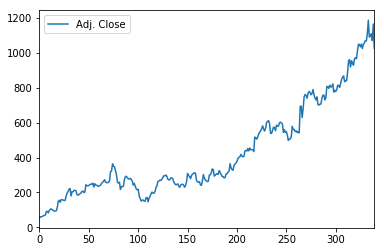

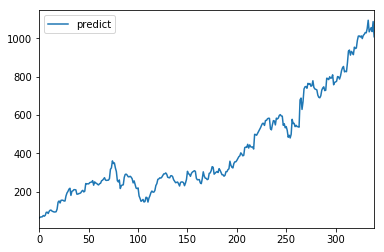

In [30]:
import matplotlib.pyplot as plt
test.as_data_frame()[['Adj. Close']].plot()
preds.as_data_frame().plot()
plt.show()